**SUPER STORE SALES ANALYSIS**

*LIBRARIES ARE IMPORTED*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

*MOUNTING DATA*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*READING DATA*

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PrepInsta_Wokerd/week 6/Superstore Sales/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


*BASIC EXPLORATION*

In [ ]:
df.shape

(9800, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

*DATA CLEANING*

In [ ]:
df.drop(columns='Row ID', inplace = True)

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df['Order Date'] = pd.to_datetime(df["Order Date"], format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df["Order Date"], format = '%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [ ]:
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df[df['Postal Code'].isna()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-05,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-07,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-06,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-23,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-23,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-23,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


from matplotlib import pyplot as plt
_df_0['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Order ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Ship Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Customer ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Customer Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Order ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Order ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ship Mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ship Mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
_df_9['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ship Mode'].value_counts()
    for x_label, grp in _df_10.groupby('Order ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Order ID')
_ = plt.ylabel('Ship Mode')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Customer ID'].value_counts()
    for x_label, grp in _df_11.groupby('Ship Mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ship Mode')
_ = plt.ylabel('Customer ID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Customer Name'].value_counts()
    for x_label, grp in _df_12.groupby('Customer ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Customer ID')
_ = plt.ylabel('Customer Name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Segment'].value_counts()
    for x_label, grp in _df_13.groupby('Customer Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Customer Name')
_ = plt.ylabel('Segment')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Order ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Sales', y='Order ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Ship Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Sales', y='Ship Mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Customer ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Sales', y='Customer ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Customer Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Sales', y='Customer Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

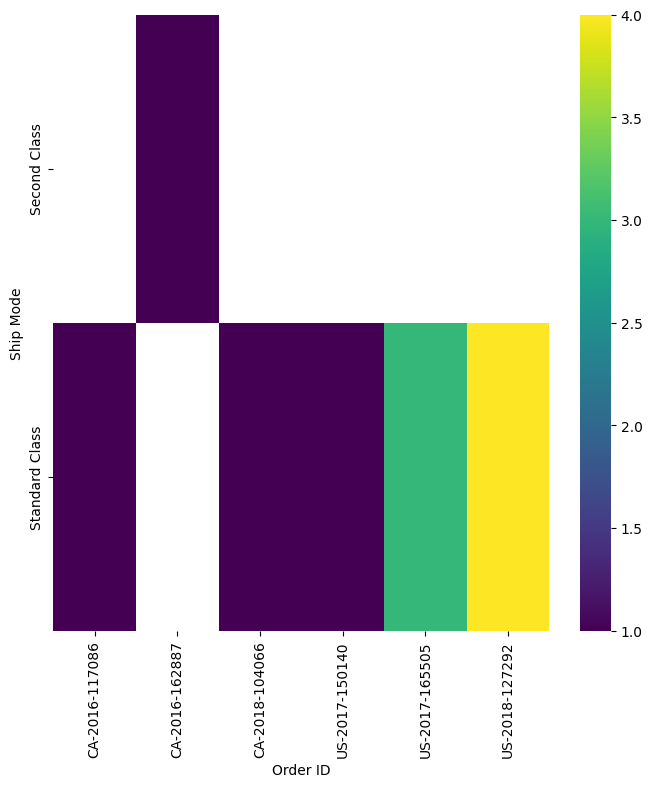

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ship Mode'].value_counts()
    for x_label, grp in _df_10.groupby('Order ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Order ID')
_ = plt.ylabel('Ship Mode')

In [ ]:
df.fillna(5401,inplace=True)

In [ ]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
df[(df['State']=='Vermont')&(df['City']=='Burlington')]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,2018-12-05,2018-12-05,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-11-07,2016-11-07,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-04-06,2017-04-06,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5401.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-23,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-23,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-23,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-19,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


from matplotlib import pyplot as plt
_df_18['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('Order ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('Ship Mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('Customer ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('Customer Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Order ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Order ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Ship Mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='Ship Mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Date']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Order Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Date')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
_df_27['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Ship Mode'].value_counts()
    for x_label, grp in _df_28.groupby('Order ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Order ID')
_ = plt.ylabel('Ship Mode')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Customer ID'].value_counts()
    for x_label, grp in _df_29.groupby('Ship Mode')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ship Mode')
_ = plt.ylabel('Customer ID')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Customer Name'].value_counts()
    for x_label, grp in _df_30.groupby('Customer ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Customer ID')
_ = plt.ylabel('Customer Name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Segment'].value_counts()
    for x_label, grp in _df_31.groupby('Customer Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Customer Name')
_ = plt.ylabel('Segment')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['Order ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='Sales', y='Order ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['Ship Mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='Sales', y='Ship Mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['Customer ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='Sales', y='Customer ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['Customer Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='Sales', y='Customer Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

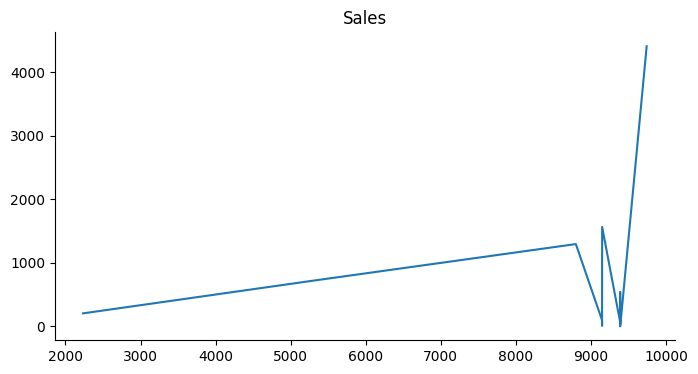

In [ ]:
from matplotlib import pyplot as plt
_df_27['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df['Postal Code'] = df['Postal Code'].astype('int')

In [ ]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

*UNIVARIATE ANALYSIS*

In [ ]:
print("Summary Statistics for Numeric Variables:")
df.describe()

Summary Statistics for Numeric Variables:


,Postal Code,Sales
count,9800.000000,9800.000000
mean,55217.343265,230.769059
std,32066.750532,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,57551.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


from matplotlib import pyplot as plt
_df_36['Postal Code'].plot(kind='hist', bins=20, title='Postal Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Postal Code', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Postal Code'].plot(kind='line', figsize=(8, 4), title='Postal Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

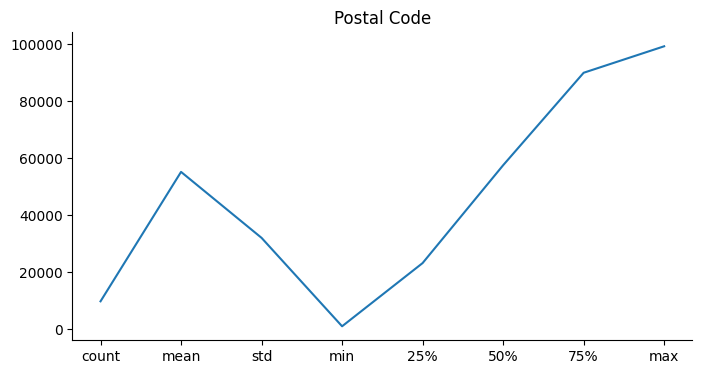

In [ ]:
from matplotlib import pyplot as plt
_df_39['Postal Code'].plot(kind='line', figsize=(8, 4), title='Postal Code')
plt.gca().spines[['top', 'right']].set_visible(False)

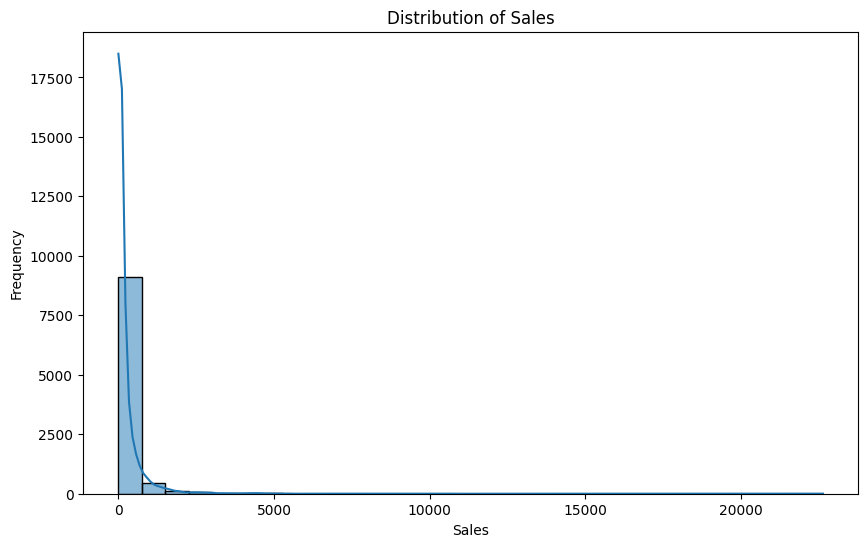

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

THE DISTRIBUTION OF THE SALES VALUES ARE SHOWN IN THE HISTOGRAM

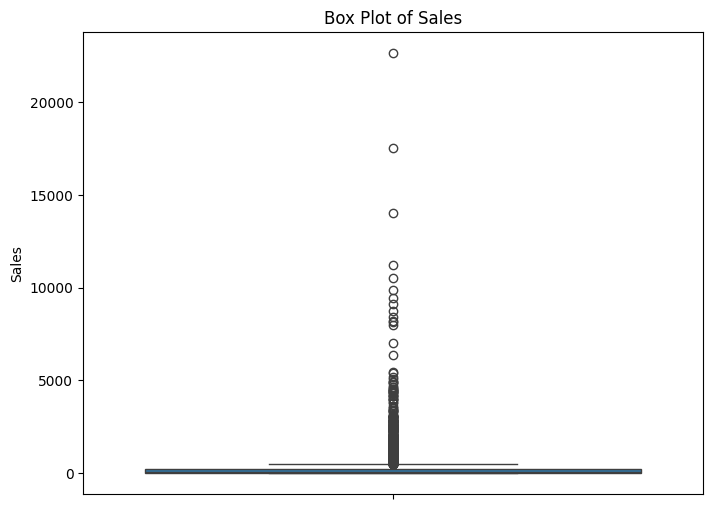

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Sales', data=df)
plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.show()

THE BOX PLOT PROVIDES A VISUAL SUMMARY OF THE CENTRAL TENDENCY, DISPERSION, AND OUTLINERS IN THE SALES DATA

*CATEGORAICAL VARIABLES*

In [ ]:
segment_counts = df['Segment'].value_counts()
print("\nFrequency count for Segment:")
print(segment_counts)


Frequency count for Segment:
Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64


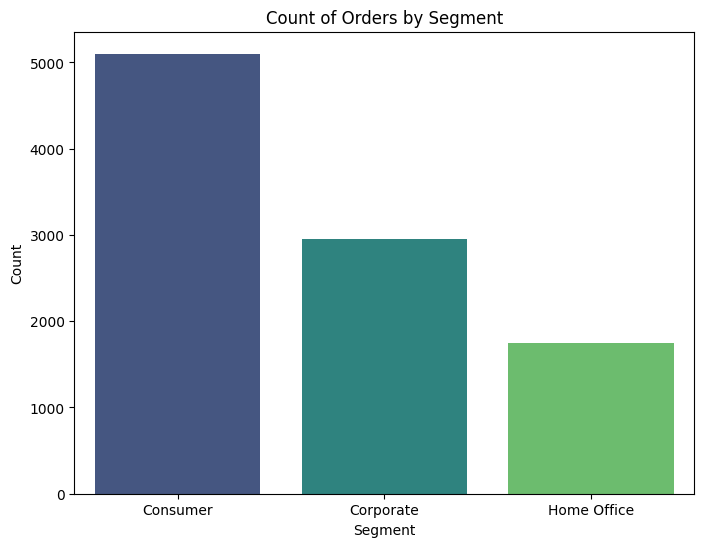

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=df, palette='viridis')
plt.title('Count of Orders by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

FREQUENCY COUNT OF ORDERS FOR EACH SEGMENT IS DISPLAYED

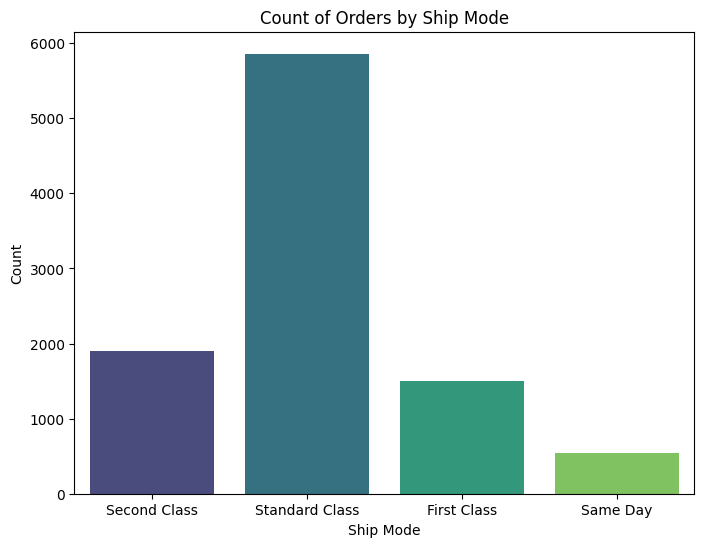

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Ship Mode', data=df, palette='viridis')
plt.title('Count of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

FREQUENCY COUNT OF ORDERS FOR EASHI SHIPPING MODE IS CATEGORISED

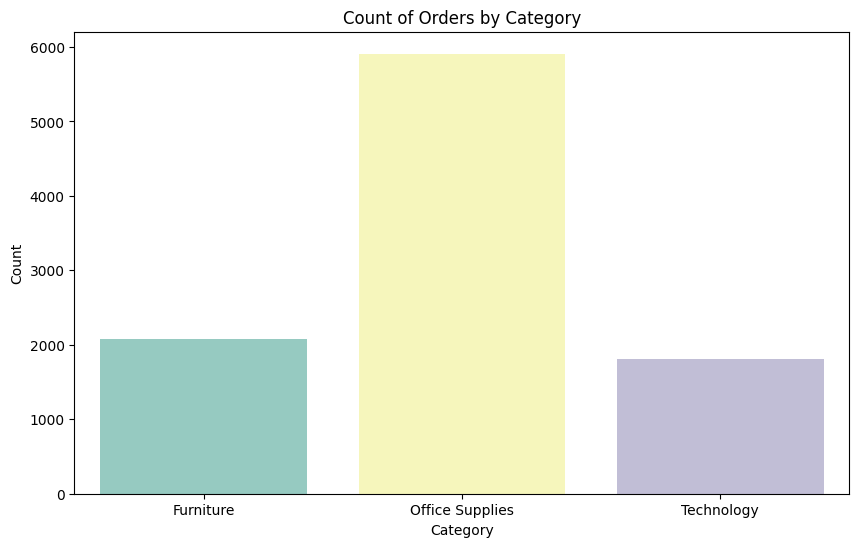

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='Set3')
plt.title('Count of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

THE FREQUENCY COUNT OF ORDERS FOR EACH PRODUCT CATEGOREY

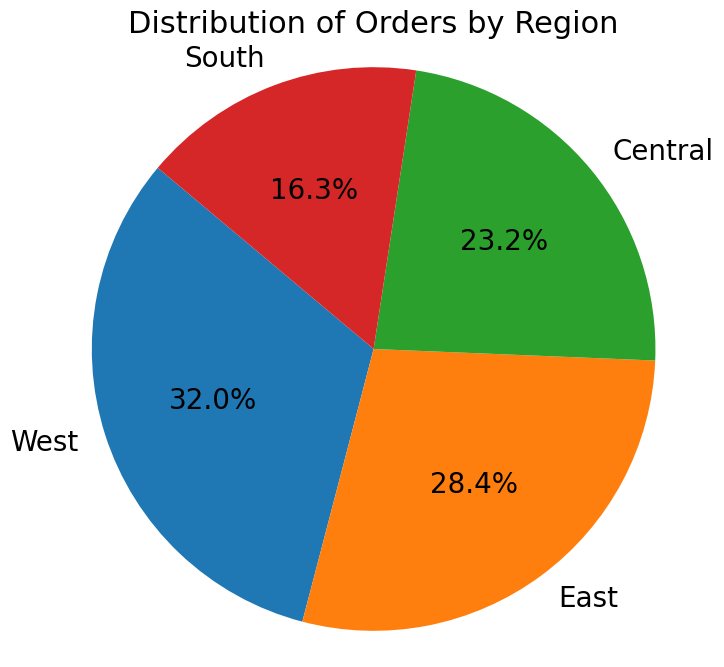

In [ ]:
region_counts = df['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140,textprops={'fontsize':20})
plt.title('Distribution of Orders by Region',fontdict={"fontsize":22})
plt.axis('equal')
plt.show()


DISPLAY THE DISTRUBUTION OF ORDERS ACROSS DIFFERENT REGIONS

**BIVARIATE ANALYSIS**

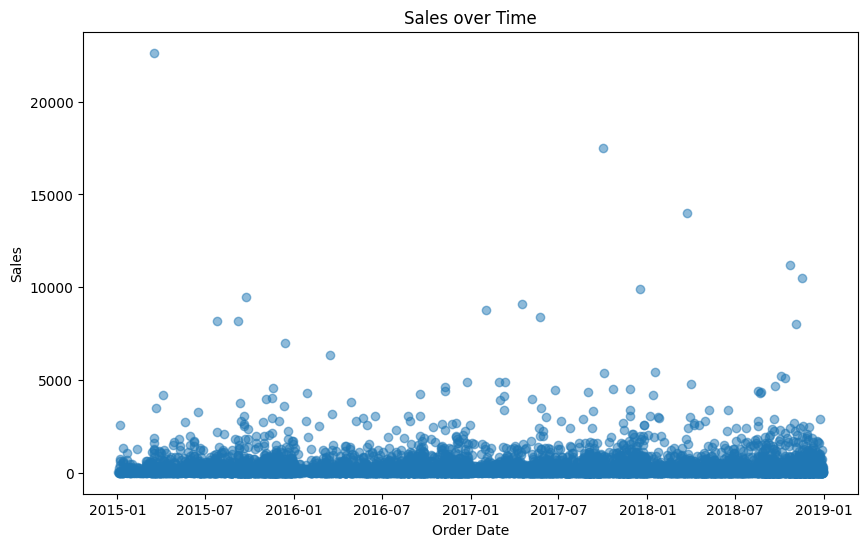

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Order Date'], df['Sales'], alpha=0.5)
plt.title('Sales over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

SALE AND ORDER DATES RELATIONSHIP

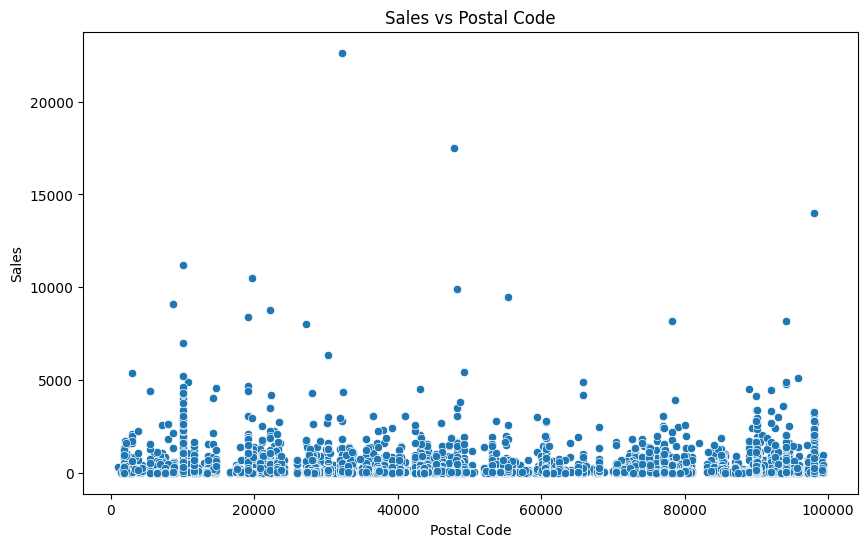

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Postal Code', y='Sales', data=df)
plt.title('Sales vs Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Sales')
plt.show()

SALES AND POSTAL CODES RELATIONSHIP EXPALINED IN THE SCATTER PLOT

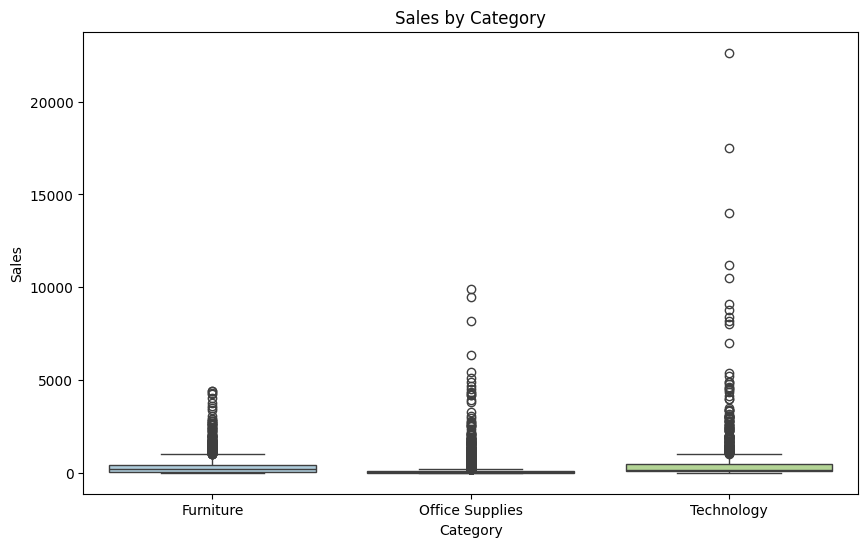

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df, palette='Paired')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


DISTRIBUTION OF SALES ACROSS DIFFERENT PRODUCT CATOGORIES IS DIFFERENTIATED

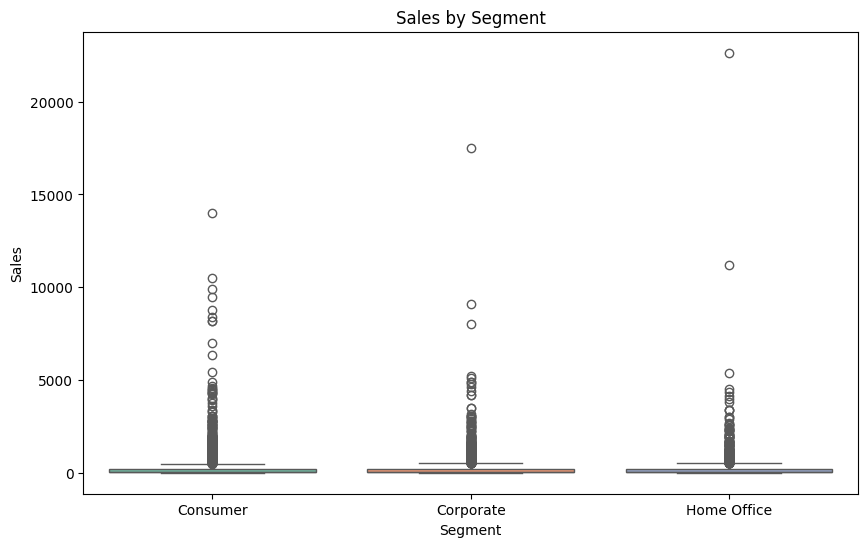

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Sales', data=df, palette='Set2')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

DISTRIBUTION OF SALES ACROSS DIFFERENT SEGMENTS IS COMPARED

In [ ]:
cross_tab = pd.crosstab(df['Segment'], df['Ship Mode'])
print("\nCross-tabulation of Segment and Ship Mode:")
print(cross_tab)


Cross-tabulation of Segment and Ship Mode:
Ship Mode    First Class  Same Day  Second Class  Standard Class
Segment                                                         
Consumer             755       312          1003            3031
Corporate            468       114           589            1782
Home Office          278       112           310            1046


<Figure size 1000x600 with 0 Axes>

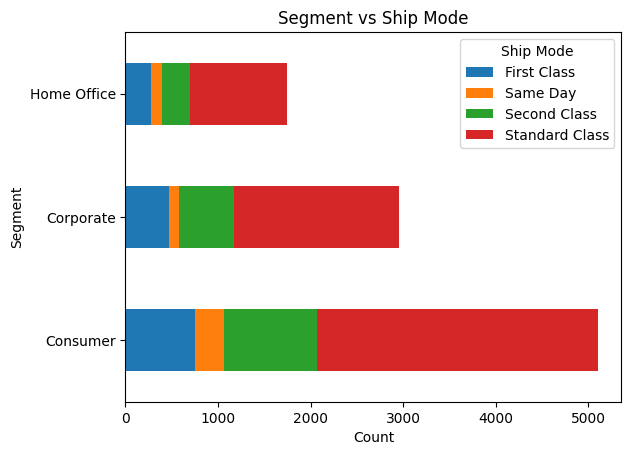

In [ ]:
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='barh', stacked=True)
plt.title('Segment vs Ship Mode')
plt.ylabel('Segment')
plt.xlabel('Count')
plt.show()

VISZUALTION IS EXPLORED THE RELATIONSHIP BETWEEN CUSTOMERS SEGMENTS AND SHIPPING MODES

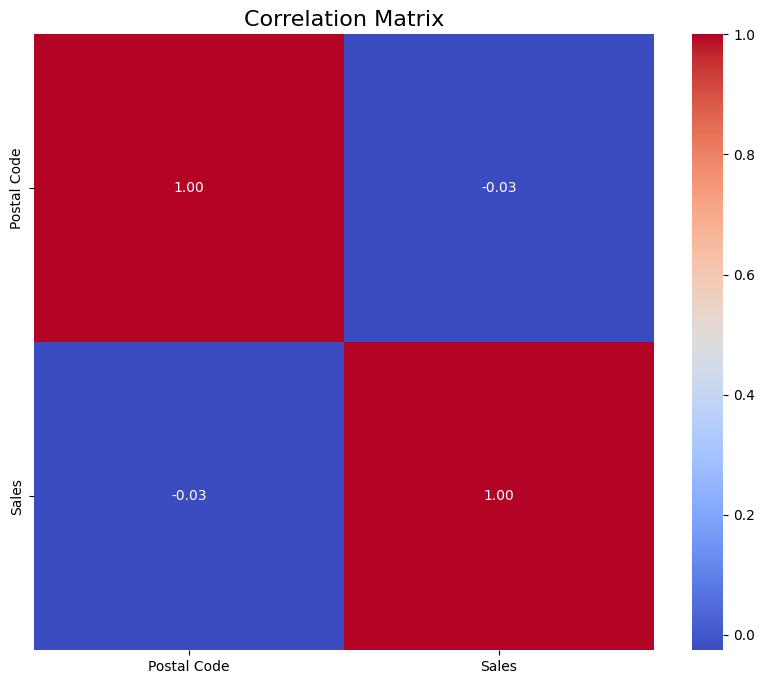

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix',fontdict={"fontsize":16},
)
plt.show()

HEATMAP REPRESENT THE VISUALIZE THE CORRELATION BETWEEN NUMERIC VARIABLES IN THE DATASET

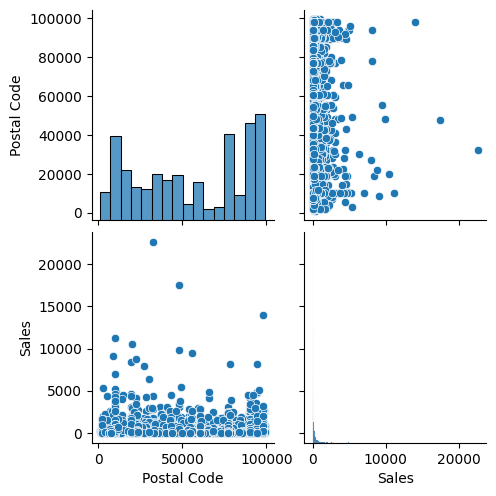

In [ ]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

PAIR PLOT DEPICTS THE PAIRWISE RELATIONSHIP BETWEEN NUMERIC VARIABLES.

*TIME SERIES ANALYSIS*

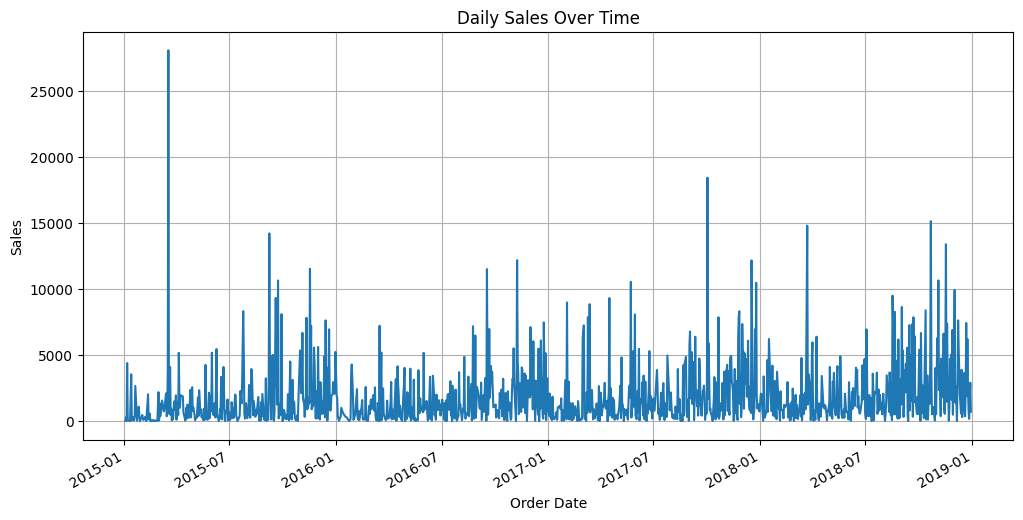

In [ ]:
daily_sales = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

REPRESENTATION OF SALES ACROSS DIFFERENT TIME

*SEASONAL DECMPOSITION*

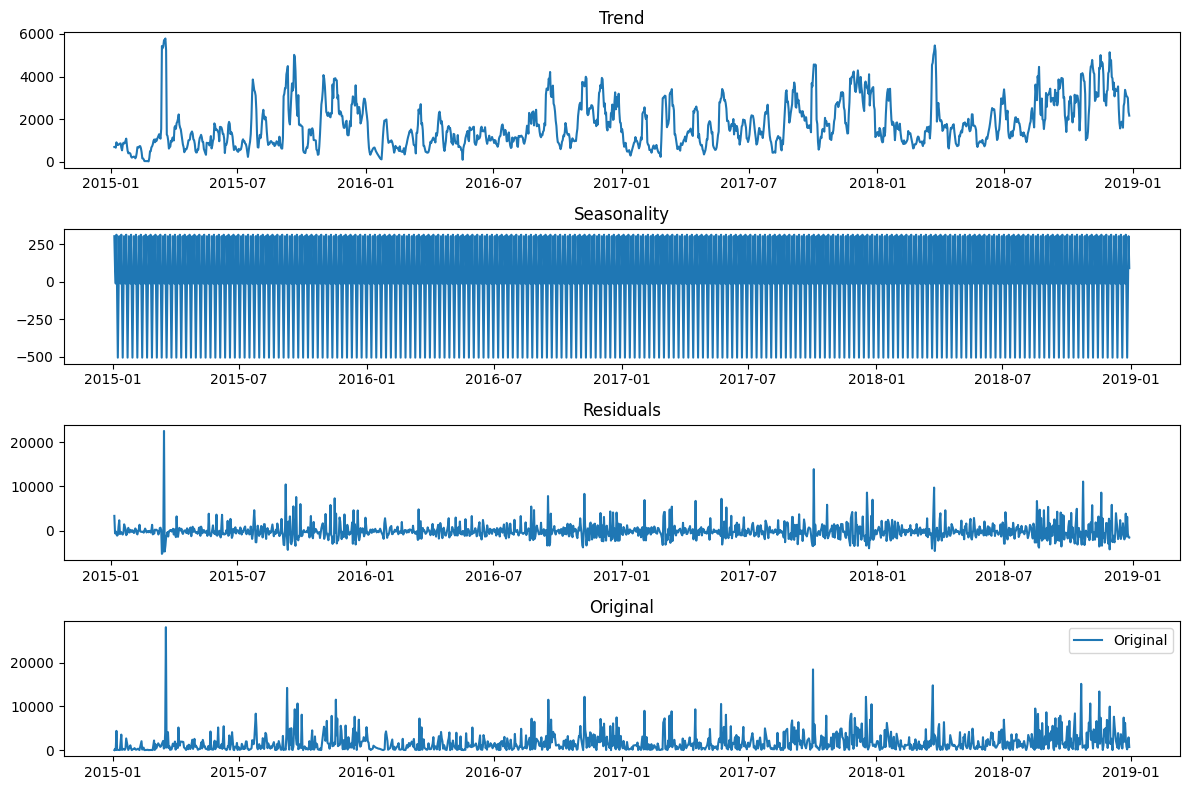

In [ ]:
daily_sales.index = pd.to_datetime(daily_sales.index)
daily_sales = daily_sales.interpolate(method='linear')
daily_sales = daily_sales.asfreq('D')
decomposition = seasonal_decompose(daily_sales, model='additive')

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.subplot(414)
plt.plot(daily_sales, label='Original')
plt.legend(loc='best')
plt.title('Original')
plt.tight_layout()
plt.show()

INTENT: THE PURPOSE OF SEASONLA DECOMPOSITION IS TO DECOMPOSE A TIME SERIES INTO ITS CONSTITUENT COMPONENTS, INCLUDING TREND, SEASONALTIY, AND RESIDUALS.



*   TREND: IDENTIFIES THE LONG TERM MOVEMENT OR DIRECTION OF THE SALES DATA, HELPING TO DISCAERN OVERALL GROWTH OR DECLINE.
*   SEASONALITY: REVEALS THE REPETATIVE PATTERNS OF CYCLES WITHIN THE DATA SUCH AS WEEKLY, MONTHLY, OR YEARLY FLUCTUATIONS.
* RESIDUALS: REPRESENTS THE RANDOM VARIATIONS OR NOISE IN THE DATA AFTER REMOVING THE TREND AND SEASONALTIY, WHICH CAN BE USEFUL FOR INDENTIFYING DIVERGENCE OR IRREGULARITIES.

